## Task 1: Importing Libraries

In [1]:
import keras
import os
import shutil
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from platform import python_version

print('Python version:', python_version())
print('Numpy version:', np.__version__)
print('Seaborn version:', sns.__version__)
from distutils.dir_util import copy_tree
import tensorflow as tf
print('tensorflow version: ',tf.__version__)
print('keras version:', keras.__version__)

Python version: 3.7.6
Numpy version: 1.18.5
Seaborn version: 0.10.0
tensorflow version:  2.3.1
keras version: 2.4.3


In [2]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras_preprocessing.image import ImageDataGenerator

## Task 2: Dataset Creation

In [3]:
#created data set using console
source='../input/african-wildlife/'
target='./train_data/'
shutil.copytree(source, target)
os.mkdir('test_data')

In [4]:
# remove unwanted data and create same classed for test_data

path="./train_data/"
for file in os.listdir(path):
    for image in os.listdir(path+file+'/'):
        if '.jpg' not in image:
            os.remove(path+file+'/'+image)
    os.mkdir('./test_data/'+file)


In [5]:
# create test_data by taking 25% images from data

total_train_images,total_test_images,total_train_classes,total_test_classes=0,0,0,0
path="./train_data/"
for file in os.listdir(path):
    total_train_classes+=1
    total_images=len(os.listdir(path+file+"/"))
    test_image_count=(25/100)*total_images #25% for test and 75% for train
    for i in range(math.ceil(test_image_count)):
        img=random.choice(os.listdir(path+file+'/'))
        shutil.move(path+file+'/'+img,'./test_data/'+file+'/')
        #print(img)
    print(file,total_images,math.ceil(test_image_count))
    total_train_images+=(total_images-math.ceil(test_image_count))
    #print(file,math.ceil(test_image_count))
print("total train images are : ",total_train_images," and total train classes are : ",total_train_classes)

rhino 375 94
zebra 376 94
elephant 375 94
buffalo 375 94
total train images are :  1125  and total train classes are :  4


## Task 3: Model Creation

In [6]:
model = Sequential()

In [7]:
#inputlayer : apply filters
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        activation='relu',
                   input_shape=(32, 32, 1)))

In [8]:
# pooling layer where we are doing maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
#adding one more convolution layer for better model
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same', 
                        activation='relu'
                      ))

In [10]:
#adding one more Pooling layer for better model
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#dropout regularlization
model.add(Dropout(0.5))

In [12]:
#layer in which we are converting 2d/3d image to 1d image i.e flattening
model.add(Flatten())

In [13]:
# layer: appling relu to give positive output from here our hidden layerrs starts
model.add(Dense(units=20, activation='relu'))

In [14]:
#dropout regularlization
model.add(Dropout(0.5))

In [15]:
# output layer : Since we have to do multi-class classification so we'll apply softmax activation function 
# we have 4 classes of animals so output layer would have that many neurons.
model.add(Dense(units=4, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                4

## Task 4: Image Augmentation

In [18]:
#url : https://keras.io/api/preprocessing/image/ 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        './train_data/',
        target_size=(32,32),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        './test_data/',
        target_size=(32,32),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')

Found 1125 images belonging to 4 classes.
Found 376 images belonging to 4 classes.


In [19]:
training_set.class_indices # to see classes of our dataset

{'buffalo': 0, 'elephant': 1, 'rhino': 2, 'zebra': 3}

## Task 5: Model Training

In [34]:
history = model.fit(
        training_set,
        steps_per_epoch=(1125/64),
        epochs=100,
        validation_data=test_set,
        validation_steps=(376/64))

Epoch 1/100
18/17 [==============================] - 26s 1s/step - loss: 0.9269 - accuracy: 0.5956 - val_loss: 1.0189 - val_accuracy: 0.6064
Epoch 2/100
18/17 [==============================] - 26s 1s/step - loss: 0.9171 - accuracy: 0.5876 - val_loss: 0.9359 - val_accuracy: 0.6223
Epoch 3/100
18/17 [==============================] - 26s 1s/step - loss: 0.9012 - accuracy: 0.6098 - val_loss: 0.9635 - val_accuracy: 0.6250
Epoch 4/100
18/17 [==============================] - 26s 1s/step - loss: 0.8760 - accuracy: 0.6293 - val_loss: 1.0889 - val_accuracy: 0.5878
Epoch 5/100
18/17 [==============================] - 26s 1s/step - loss: 0.9018 - accuracy: 0.6151 - val_loss: 0.9276 - val_accuracy: 0.6277
Epoch 6/100
18/17 [==============================] - 26s 1s/step - loss: 0.8997 - accuracy: 0.6133 - val_loss: 0.9796 - val_accuracy: 0.6170
Epoch 7/100
18/17 [==============================] - 26s 1s/step - loss: 0.9298 - accuracy: 0.5831 - val_loss: 1.0702 - val_accuracy: 0.5771
Epoch 8/100
1

## Task 6: Accuracy

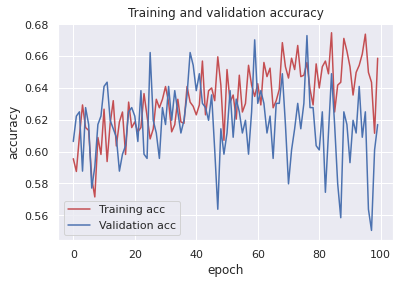

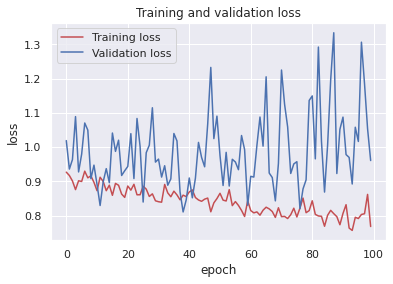

In [35]:
#Graphing our training and validation
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
#model.save("simple_animal_classification_model.h5")#save model

In [ ]:
#from keras.models import load_model
#model=load_model("simple_animal_classification_model.h5") 

## Task 7: Testing

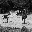

In [54]:
from keras.preprocessing import image
test_image = image.load_img("../input/african-wildlife/zebra/005.jpg",target_size=(32,32),color_mode='grayscale')
test_image 


In [55]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [57]:
result = model.predict(test_image)

my_dict=training_set.class_indices
def get_key(val): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

pred=list(result[0])
for i in range(len(pred)):
    if pred[i]!=0:
        print(get_key(i))

zebra
